In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
mapper = {
    'gpt-4-turbo': 'GPT-4 Turbo',
    'claude-3-opus': 'Claude 3 Opus',
    'gemini-1.5-pro': 'Gemini 1.5 Pro',
    'gemini-1.0-pro': 'Gemini 1.0 Pro',
    'mistral-large': 'Mistral Large',
    'mistal-8x22b': 'Mistral 8x22B',
    'llama3-70b': 'Llama 3 70B',
}

In [79]:
## Define the data
# models = ["Human level*", "GPT-4 Turbo", "Claude 3 Opus", "Mistral Large", "Gemini Pro 1.5",
#           "Gemini Pro 1.0", "Llama 3 70B", "Mistral 8x22B"]
# mean_scores = [80, 38, 33, 30, 29, 27, 21, 16]
# lower_bounds = [10, 16, 15, 15, 15, 15, 13, 11]
# upper_bounds = [10, 16, 15, 15, 15, 15, 13, 11]


final_stats = pd.read_csv('./tables_and_charts/final_stats.csv')
final_stats['model'] = final_stats['model'].map(mapper)
final_stats.iloc[-1] = {
    'model': 'Human level*',
    'mean_score': 86,
    'std_dev_score': 0,
    'z_interval_error': 0,
    'ci_lower': 90,
    'ci_upper': 81,
}
final_stats = final_stats.sort_values(by='mean_score', ascending=False)

models = final_stats['model'].to_list()
mean_scores = final_stats['mean_score'].to_list()
lower_bounds = final_stats['ci_lower'].to_list()
upper_bounds = final_stats['ci_upper'].to_list()

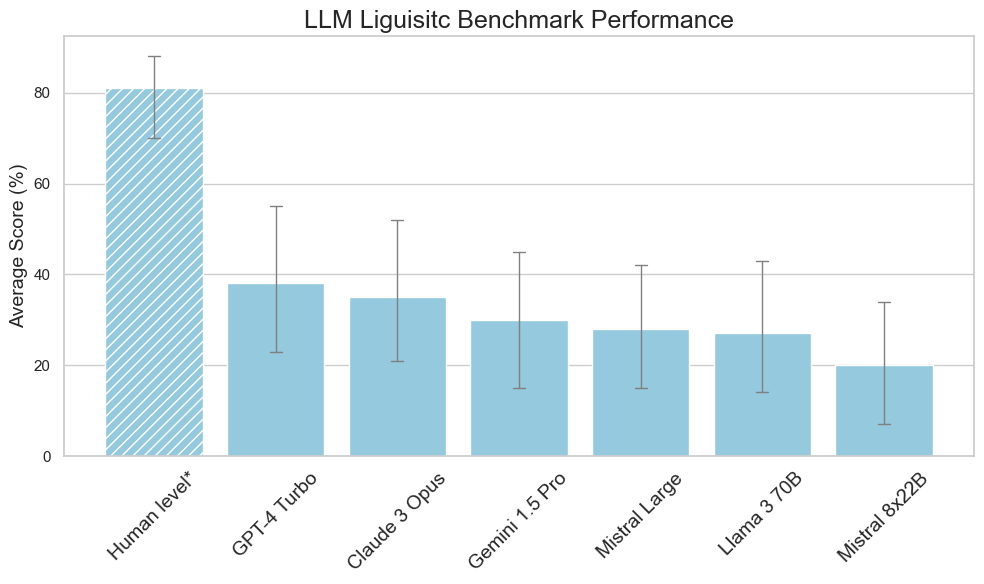

In [80]:
data = {
    "Model": models,
    "Average": mean_scores,
    "Confidence Interval Low": lower_bounds,
    "Confidence Interval High": upper_bounds,
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create a basic barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x="Model", y="Average", color="skyblue", errorbar=None)

# Shade the first bar with black cross lines
for i, bar in enumerate(barplot.patches):  # Loop through the bars
    if i == 0:  # The first bar
        bar.set_hatch('///')  # Apply hatching

# Add confidence intervals as vertical lines with caps
capwidth = 0.1  # Width of the cap lines
for i, model in enumerate(df["Model"]):
    plt.plot([i, i], [df["Confidence Interval Low"][i], df["Confidence Interval High"][i]],
             color='grey', lw=1)
    # Add horizontal caps
    plt.plot([i - capwidth / 2, i + capwidth / 2],
             [df["Confidence Interval Low"][i], df["Confidence Interval Low"][i]],
             color='grey', lw=1)
    plt.plot([i - capwidth / 2, i + capwidth / 2],
             [df["Confidence Interval High"][i], df["Confidence Interval High"][i]],
             color='grey', lw=1)

plt.title("LLM Liguisitc Benchmark Performance", fontsize=18)
plt.xlabel("", fontsize=14)
plt.ylabel("Average Score (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()